In [1]:
# Required imports

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
from numpy import pi, random

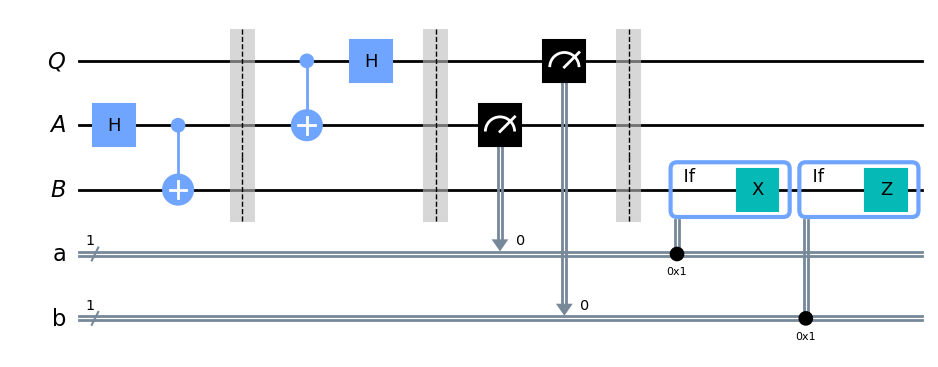

In [16]:
qubit = QuantumRegister(1,"Q")
ebit0 = QuantumRegister(1,"A")
ebit1 = QuantumRegister(1,"B")

a = ClassicalRegister(1,"a")
b = ClassicalRegister(1,"b")

circuit = QuantumCircuit(qubit, ebit0, ebit1, a, b)

## Bell +
circuit.h(ebit0)
circuit.cx(ebit0, ebit1)
circuit.barrier()

# Alice operations
circuit.cx(qubit, ebit0)
circuit.h(qubit)
circuit.barrier()

# Alice's measures
circuit.measure(ebit0, a)
circuit.measure(qubit, b)
circuit.barrier()

# Bob's operations
with circuit.if_test((a,1)):
    circuit.x(ebit1)
with circuit.if_test((b,1)):
    circuit.z(ebit1)

display(circuit.draw("mpl"))